# Inverse Probability weighting
Bs Vương Kiến Thanh

Đây là bài tiếp theo của series Causal Survival Analysis. Ở bài trước tôi đã giới thiệu cách tìm survival curve thông qua phương pháp parametric là fit mô hình logistic.

Sau khi fit mô hình, chúng ta có thể suy luận được hiệu ứng của điều trị (`qsmk`: bỏ hút thuốc) tác động lên thời gian sống còn $S(t)$. Tuy nhiên, hiệu ứng đó chỉ thể hiện mối tương quan của nhau nhóm điều trị, chứ không phải hiệu ứng nhân quả.

Để tìm hiệu ứng nhân quả, chúng ta có thể áp dụng hai phương pháp: *IP weighting* và *standardization*.

## 1. Giới thiệu Inverse probability weighting
Tạm gọi là *Trọng số xác suất nghịch*, hay *IP weighting*. Thông thường việc nhận điều trị sẽ bị sai lệch (biased) bởi các hiệp biến. Ví dụ như người già, phụ nữ thì ít hút thuốc hơn. Nhiệm vụ của những *trọng số* này là tạo ra hai mẫu dân số **ảo** (pseudo-population) sao cho xác suất nhận điều trị ở hai mẫu này là bằng nhau.

Gọi $L$ là các hiệp biến, $A$ là điều trị, phương pháp làm cho:
$$ \text{Pseudo}: Pr[A|L=l_1] = Pr[A|L=l_2]=... $$

Để xem tại sao IP weighting lại làm được, ta xem ví dụ sau:  
Trong mẫu nghiên cứu có 20 người, có 2 nhóm hiệp biến`l1` `l2`. Ở nhóm `l1`, xác suất nhận điều trị như nhau nhưng ở nhóm `l2`, xác suất nhận điều trị không tương đồng.

[![](https://mermaid.ink/img/eyJjb2RlIjoiZ3JhcGggVERcbmEoMjAgbmfGsOG7nWkpXG5hIC0tbF8xLS0tIGIoXCI4ICgwLjQpXCIgKVxuYSAtLWxfMi0tLSBjKFwiMTIgKDAuNilcIilcbmIgLS1cIkE9MFwiLS0tIGQoXCI0ICgwLjUpXCIpXG5iIC0tXCJBPTFcIi0tLSBlKFwiNCAoMC41KVwiKVxuZCAtLVwiWT0wXCItLS0gZigoXCIzICgwLjc1KVwiKSlcbmQgLS1cIlk9MVwiLS0tIGcoKFwiMSAoMC4yNSlcIikpXG5lIC0tXCJZPTBcIi0tLSBoKChcIjMgKDAuNzUpXCIpKVxuZSAtLVwiWT0xXCItLS0gaSgoXCIxICgwLjI1KVwiKSlcbmMgLS1cIkE9MFwiLS0tIGooXCIzICgwLjI1KVwiKVxuYyAtLVwiQT0xXCItLS0gayhcIjkgKDAuNzUpXCIpXG5qIC0tXCJZPTBcIi0tLSBsKChcIjEgKDEvMylcIikpXG5qIC0tXCJZPTFcIi0tLSBtKChcIjIgKDIvMylcIikpXG5rIC0tXCJZPTBcIi0tLSBuKChcIjMgKDEvMylcIikpXG5rIC0tXCJZPTFcIi0tLSBvKChcIjYgKDIvMylcIikpIiwibWVybWFpZCI6eyJ0aGVtZSI6ImRlZmF1bHQifSwidXBkYXRlRWRpdG9yIjpmYWxzZSwiYXV0b1N5bmMiOnRydWUsInVwZGF0ZURpYWdyYW0iOmZhbHNlfQ)](https://mermaid-js.github.io/mermaid-live-editor/edit##eyJjb2RlIjoiZ3JhcGggVERcbmEoMjAgbmfGsOG7nWkpXG4gLS1sXzEtLS0gYihcIjggKDAuNClcIiApXG5hIC0tbF8yLS0tIGMoXCIxMiAoMC42KVwiKVxuYiAtLVwiQT0wXCItLS0gZChcIjQgKDAuNSlcIilcbmIgLS1cIkE9MVwiLS0tIGUoXCI0ICgwLjUpXCIpXG5kIC0tXCJZPTBcIi0tLSBmKChcIjMgKDAuNzUpXCIpKVxuZCAtLVwiWT0xXCItLS0gZygoXCIxICgwLjI1KVwiKSlcbmUgLS1cIlk9MFwiLS0tIGgoKFwiMyAoMC43NSlcIikpXG5lIC0tXCJZPTFcIi0tLSBpKChcIjEgKDAuMjUpXCIpKVxuYyAtLVwiQT0wXCItLS0gaihcIjMgKDAuMjUpXCIpXG5jIC0tXCJBPTFcIi0tLSBrKFwiOSAoMC43NSlcIilcbmogLS1cIlk9MFwiLS0tIGwoKFwiMSAoMS8zKVwiKSlcbmogLS1cIlk9MVwiLS0tIG0oKFwiMiAoMi8zKVwiKSlcbmsgLS1cIlk9MFwiLS0tIG4oKFwiMyAoMS8zKVwiKSlcbmsgLS1cIlk9MVwiLS0tIG8oKFwiNiAoMi8zKVwiKSkiLCJtZXJtYWlkIjoie1xuICBcInRoZW1lXCI6IFwiZGVmYXVsdFwiXG59IiwidXBkYXRlRWRpdG9yIjpmYWxzZSwiYXV0b1N5bmMiOnRydWUsInVwZGF0ZURpYWdyYW0iOmZhbHNlfQ)

Bằng cách tính trọng số $W^A = 1/ Pr(A/L)$, ta có thể tạo ra những mẫu ảo để xác suất nhận được điều trị là như nhau.

[![](https://mermaid.ink/img/eyJjb2RlIjoiZ3JhcGggVERcbmEoXCI0MCBuZ8aw4budaSAo4bqjbylcIilcbmEgLS1sXzEtLS0gYihcIjE2ICgwLjQpXCIgKVxuYSAtLWxfMi0tLSBjKFwiMjQgKDAuNilcIilcbmIgLS1cIkE9MFwiLS0tIGQoOD00KjIpXG5iIC0tXCJBPTFcIi0tLSBlKDg9NCoyKVxuZCAtLVwiWT0wXCItLS0gZigoXCI2ICgwLjc1KVwiKSlcbmQgLS1cIlk9MVwiLS0tIGcoKFwiMiAoMC4yNSlcIikpXG5lIC0tXCJZPTBcIi0tLSBoKChcIjYgKDAuNzUpXCIpKVxuZSAtLVwiWT0xXCItLS0gaSgoXCIyICgwLjI1KVwiKSlcbmMgLS1cIkE9MFwiLS0tIGooXCIxMj0zKjRcIilcbmMgLS1cIkE9MVwiLS0tIGsoXCIxMj05KjEuMzNcIilcbmogLS1cIlk9MFwiLS0tIGwoKFwiNCAoMS8zKVwiKSlcbmogLS1cIlk9MVwiLS0tIG0oKFwiOCAoMi8zKVwiKSlcbmsgLS1cIlk9MFwiLS0tIG4oKFwiNCAoMS8zKVwiKSlcbmsgLS1cIlk9MVwiLS0tIG8oKFwiOCAoMi8zKVwiKSlcbmYgLS4tPiBwWzEvLjU9Ml1cbmcgLS4tPiBxWzEvLjU9Ml1cbmggLS4tPiByWzEvLjU9Ml1cbmkgLS4tPiBzWzEvLjU9Ml1cbmwgLS4tPiB0WzEvLjI1PTRdXG5tIC0uLT4gdVsxLy4yNT00XVxubiAtLi0-IHZbMS8uNzU9MS4zM11cbm8gLS4tPiB3WzEvLjc1PTEuMzNdIiwibWVybWFpZCI6eyJ0aGVtZSI6ImRlZmF1bHQifSwidXBkYXRlRWRpdG9yIjpmYWxzZSwiYXV0b1N5bmMiOnRydWUsInVwZGF0ZURpYWdyYW0iOmZhbHNlfQ)](https://mermaid-js.github.io/mermaid-live-editor/edit##eyJjb2RlIjoiZ3JhcGggVERcbmEoXCI0MCBuZ8aw4budaSAo4bqjbylcIilcbmEgLS1sXzEtLS0gYihcIjE2ICgwLjQpXCIgKVxuYSAtLWxfMi0tLSBjKFwiMjQgKDAuNilcIilcbmIgLS1cIkE9MFwiLS0tIGQoOD00KjIpXG5iIC0tXCJBPTFcIi0tLSBlKDg9NCoyKVxuZCAtLVwiWT0wXCItLS0gZigoXCI2ICgwLjc1KVwiKSlcbmQgLS1cIlk9MVwiLS0tIGcoKFwiMiAoMC4yNSlcIikpXG5lIC0tXCJZPTBcIi0tLSBoKChcIjYgKDAuNzUpXCIpKVxuZSAtLVwiWT0xXCItLS0gaSgoXCIyICgwLjI1KVwiKSlcbmMgLS1cIkE9MFwiLS0tIGooXCIxMj0zKjRcIilcbmMgLS1cIkE9MVwiLS0tIGsoXCIxMj0qMS4zM1wiKVxuaiAtLVwiWT0wXCItLS0gbCgoXCI0ICgxLzMpXCIpKVxuaiAtLVwiWT0xXCItLS0gbSgoXCI4ICgyLzMpXCIpKVxuayAtLVwiWT0wXCItLS0gbigoXCI0ICgxLzMpXCIpKVxuayAtLVwiWT0xXCItLS0gbygoXCI4ICgyLzMpXCIpKVxuZiAtLi0-IHBbMS8uNT0yXVxuZyAtLi0-IHFbMS8uNT0yXVxuaCAtLi0-IHJbMS8uNT0yXVxuaSAtLi0-IHNbMS8uNT0yXVxubCAtLi0-IHRbMS8uMjU9NF1cbm0gLS4tPiB1WzEvLjI1PTRdXG5uIC0uLT4gdlsxLy43NT0xLjMzXVxubyAtLi0-IHdbMS8uNzU9MS4zM10iLCJtZXJtYWlkIjoie1xuICBcInRoZW1lXCI6IFwiZGVmYXVsdFwiXG59IiwidXBkYXRlRWRpdG9yIjpmYWxzZSwiYXV0b1N5bmMiOnRydWUsInVwZGF0ZURpYWdyYW0iOmZhbHNlfQ)

## 2. IP weighting khi $L$ có nhiều đặc trưng (features)
Trong ví dụ trên chúng ta phương pháp non-parametric để ước lượng IP weights. Tuy nhiên khi số lượng hiệp biến tăng thì chúng ta phải dùng model.  
Do điều trị là biến nhị phân nên có thể dùng mô hình đơn giản nhất là logistic. Khi điều trị `A` là biến định lượng như hàm lượng thuốc,.. thì phải dùng mô hình như Gaussian.

Bộ dataset tiếp tục là của NHEFS. Trong đó Điều trị (`A`) là `qsmk` (cai hút thuốc lá), Kết cục (`Y`) là `wt82_71` (cân nặng tăng lên từ năm 71 đến năm 82), và 9 hiệp biến còn lại (`L`) là `['age','sex','race','education','wt71','smokeintensity','smokeyrs','exercise','active']`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
import numpyro as npr
import numpyro.distributions as dist
from numpyro.infer import Predictive, SVI, Trace_ELBO
from numpyro.infer.autoguide import AutoLaplaceApproximation
from numpyro.optim import Adam
from numpyro.diagnostics import print_summary
import arviz as az
import jax.numpy as jnp
from jax.scipy.special import expit
from jax.random import PRNGKey
az.style.use("fivethirtyeight")

# col_info = pd.read_excel(r'https://cdn1.sph.harvard.edu/wp-content/uploads/sites/1268/2012/10/NHEFS_Codebook.xls')
origin= pd.read_csv(
    r'https://cdn1.sph.harvard.edu/wp-content/uploads/sites/1268/1268/20/nhefs.csv')

In [2]:
struct = {
    'A': 'qsmk',
    'Y': 'wt82_71',
    'continuous': ['age', 'wt71','smokeintensity','smokeyrs'],
    'multi_cate': ['education', 'exercise', 'active'],
    'binary_cate': ['sex', 'race'],
}


def get_df(struct):
    L = [j for i in ['continuous','multi_cate','binary_cate'] for j in struct[i]]
    df = origin[[struct['A'],struct['Y']]+L].copy()
    df.dropna(inplace=True)
    return df

df = get_df(struct)
df.shape

(1566, 11)

### Bước 1: Tìm $Pr[A|L]$

Ở đây, các biến định lượng được bình phương và standardize, các biến phân nhóm >2 nhóm sẽ được one hot encoding.

In [3]:
def transform(df, standardize_A, standardize_Y,
              A, Y, continuous, multi_cate, binary_cate):
    quadratic = [x+'^2' for x in continuous]
    for q,c in zip(quadratic, continuous):
        df[q] = df[c]**2
        
    std_col = continuous + quadratic
    if standardize_A:
        std_col += [A]
        A_ = A + '_std'
    else:
        A_ = A
    if standardize_Y:
        std_col += [Y]
        Y_ = Y + '_std'
    else:
        Y_ = Y
    scalers = dict()
    for col in std_col:
        scalers[col] = StandardScaler()
        df[col+'_std'] = scalers[col].fit_transform(df[[col]])
    continuous_std = [x+'_std' for x in continuous+quadratic]
    
    
    dummies = []
    all_cate = binary_cate.copy()
    for c in multi_cate:
        dummies += [pd.get_dummies(df[c], prefix=c)]
        all_cate += [c + '_'+ str(i) for i in df[c].unique()]
    df = pd.concat([df] + dummies, axis=1)
    
    return df, continuous_std, all_cate, A_, Y_, scalers

df, continuous_std, all_cate, A_, Y_, scalers= transform(
    df, False, True,**struct)

print(continuous_std, all_cate, A_, Y_)
df.iloc[:,-20:].head()

['age_std', 'wt71_std', 'smokeintensity_std', 'smokeyrs_std', 'age^2_std', 'wt71^2_std', 'smokeintensity^2_std', 'smokeyrs^2_std'] ['sex', 'race', 'education_1', 'education_2', 'education_3', 'education_5', 'education_4', 'exercise_2', 'exercise_0', 'exercise_1', 'active_0', 'active_1', 'active_2'] qsmk wt82_71_std


,age_std,wt71_std,smokeintensity_std,smokeyrs_std,age^2_std,wt71^2_std,smokeintensity^2_std,smokeyrs^2_std,wt82_71_std,education_1,education_2,education_3,education_4,education_5,exercise_0,exercise_1,exercise_2,active_0,active_1,active_2
0,-0.138465,0.536190,0.805115,0.367510,-0.261753,0.417621,0.549151,0.139323,-1.616303,1,0,0,0,0,0,0,1,1,0,0
1,-0.639050,-0.796924,-0.044659,-0.048991,-0.690333,-0.760652,-0.257901,-0.260641,-0.004231,0,1,0,0,0,1,0,0,1,0,0
2,1.029566,-0.915801,-0.044659,0.117610,0.994683,-0.848756,-0.257901,-0.109711,0.860206,0,1,0,0,0,0,0,1,1,0,0
3,2.030735,-0.745324,-1.489276,2.366716,2.357349,-0.721545,-0.889015,3.109622,0.298553,1,0,0,0,0,0,0,1,0,1,0
4,-0.305327,1.061990,-0.044659,-0.465492,-0.411939,0.978420,-0.257901,-0.585140,0.298443,0,1,0,0,0,0,1,0,0,1,0


Việc tìm $Pr [A|L]$ sẽ thông qua mô hình logistic với $A$ là Outcome.

In [4]:
pr_A_L = LogisticRegression()
pr_A_L.fit(
    X=df[continuous_std + all_cate],
    y=df[A_].values)

LogisticRegression()

### Bước 2: Nghịch đảo xác suất 
$W^A=\frac{1}{ Pr[A=a|L]}$

In [5]:
probs = pr_A_L.predict_proba(df[continuous_std + all_cate])
df['IP_weight'] = np.reciprocal(np.where(df[A_]==0, probs[:,0], probs[:,1]))
df['IP_weight'].describe()

count    1566.000000
mean        1.988256
std         1.424939
min         1.060002
25%         1.235157
50%         1.370862
75%         1.985283
max        15.772046
Name: IP_weight, dtype: float64

## 3. Stabilized IP weights
Nhiệm vụ chính của phương pháp này là làm cho $A$ không phụ thuộc vào $L$. Cho nên nếu muốn xác suất nhận được điều trị ở một nhóm ảo là 0.5, bạn có thể dùng $0.5/Pr[A|L]$. Khi đó trọng số sẽ có trung bình là 1 và cho kết quả hiệu ứng là như nhau. Thực vậy, bạn có thể chọn bất kì $p$ nào thỏa $0<p\leq1$ cho từng mẫu dân số ảo.

Một phương pháp thông dụng là dùng chính xác suất điều trị trong dataset gốc cho nhóm (ảo) nhận điều trị, và ngược lại.
$$SW^A = \frac{Pr[A=a]}{Pr[A=a|L]}$$

In [6]:
pr_A_0 = (df[A_]==0).sum() / df[A_].size
pr_A_1 = 1 - pr_A_0

df['IP_weight_stb'] = np.where(df[A_]==0, df['IP_weight']*pr_A_0, df['IP_weight']*pr_A_1 )
df['IP_weight_stb'].describe()

count    1566.000000
mean        0.996309
std         0.270424
min         0.327348
25%         0.870002
50%         0.952293
75%         1.075782
max         4.058834
Name: IP_weight_stb, dtype: float64

## 4. Ước lượng hiệu ứng nhân quả
Sau khi có được IP weight, bạn có thể suy luận hiệu ứng nhân quả của điều trị.

#### Mô hình biased

In [7]:
m = LinearRegression()
m.fit(
    X=df[[A_]],
    y=df[Y_].values)
m.intercept_, m.coef_

(-0.082997250484532, array([0.32251537]))

#### Mô hình có IP weight

In [8]:
m_w = LinearRegression()
m_w.fit(
    X=df[[A_]],
    y=df[Y_].values,
    sample_weight=df['IP_weight'])
m_w.intercept_, m_w.coef_

(-0.1090339882198774, array([0.44100654]))

#### Mô hình có stabiblized IP weight

In [9]:
m_w_stb = LinearRegression()
m_w_stb.fit(
    X=df[[A_]],
    y=df[Y_].values,
    sample_weight=df['IP_weight_stb'])
m_w_stb.intercept_, m_w_stb.coef_

(-0.10903398821987736, array([0.44100654]))

In [10]:
scalers['wt82_71'].scale_*0.44

array([3.46605447])

Như vậy, sau khi data được cân bằng xác suất nhận điều trị, ta có thể suy luận hiệu ứng nhân quả của điều trị (`qsmk`) lên kết cục (`wt82_71`). Ta có thể sử dụng mô hình cơ bản là linear regression.

Theo mô hình nhân quả, khi ngưng hút thuốc lá sẽ tăng trung bình là 0.44 độ lệch chuẩn của `wt82_71` hay 3.4 kg.

## 5. Hệ số của biến `qsmk` ở hai mô hình sử dụng IP weight và stabiblized IP weight
là bằng nhau. Vậy tại sao lại dùng stabilized IP weights?  

Stabilized IP weight thường cho ước lượng khoảng tin cậy hẹp hơn. Nhưng tín ưu việt của nó sẽ rõ hơn khi biến điều trị là định lượng. Thông thường xác suất của biến định lượng là tích phân PDF, rất khó để ước lượng xác suất chính xác.

Cho nên khi đó nếu dùng IP weight thì rất nguy hiểm. Việc dùng stabilized IP weight sẽ tránh được vấn đề này.

$$SW^A = \frac{f[A]}{f[A|L]} = \frac{Pr[A]}{Pr[A|L]}$$

Giả sử chúng ta xem xét đến một tập nhỏ trong `df` gồm những người hút ít hơn 25 điếu thuốc lá trong 1 ngày. Biến điều trị $A$ là sự thay đổi số thuốc lá hút trong 1 ngày `smkintensity82_71` tác dụng lên kết cục $D$ là sự tăng cân `wt82_71`. Lúc này $L$ sẽ khác. 

In [11]:
struct = {
    'A': 'smkintensity82_71',
    'Y': 'wt82_71',
    'continuous': ['age', 'wt71','smokeyrs', 'smokeintensity'],
    'multi_cate': ['education', 'exercise', 'active'],
    'binary_cate': ['sex', 'race'],
}

df = get_df(struct)
df = df[df['smokeintensity']<=25]
df.shape

(1162, 11)

In [12]:
df, continuous_std, all_cate, A_, Y_, scalers= transform(
    df, True, True, **struct)
print(continuous_std, all_cate, A_, Y_)
df.iloc[:,-20:].head()

['age_std', 'wt71_std', 'smokeyrs_std', 'smokeintensity_std', 'age^2_std', 'wt71^2_std', 'smokeyrs^2_std', 'smokeintensity^2_std'] ['sex', 'race', 'education_2', 'education_1', 'education_3', 'education_5', 'education_4', 'exercise_0', 'exercise_2', 'exercise_1', 'active_0', 'active_1', 'active_2'] smkintensity82_71_std wt82_71_std


,wt71_std,smokeyrs_std,smokeintensity_std,age^2_std,wt71^2_std,smokeyrs^2_std,smokeintensity^2_std,smkintensity82_71_std,wt82_71_std,education_1,education_2,education_3,education_4,education_5,exercise_0,exercise_1,exercise_2,active_0,active_1,active_2
1,-0.742829,-0.037746,0.789722,-0.706097,-0.716836,-0.258833,0.801960,-0.759065,0.008036,0,1,0,0,0,1,0,0,1,0,0
2,-0.866289,0.124401,0.789722,0.934800,-0.809730,-0.110677,0.801960,-1.141352,0.886124,0,1,0,0,0,0,0,1,1,0,0
3,-0.689239,2.313392,-1.825561,2.261787,-0.675602,3.049492,-1.491355,0.578942,0.315601,1,0,0,0,0,0,0,1,0,1,0
4,1.187761,-0.443115,0.789722,-0.434992,1.116809,-0.577369,0.801960,0.196654,0.315490,0,1,0,0,0,0,1,0,0,1,0
5,1.995678,-0.280967,-0.748680,-0.212936,2.096741,-0.458844,-0.957617,1.152373,0.241963,0,1,0,0,0,0,1,0,0,1,0


Tôi lặp lại quy trình tính *IP weight* và *stabilized IP weights* thông qua tìm $Pr[A|L]$ và $Pr[A]$. Điều khác biệt ở đây là:
- $Pr[A|L]$ được tìm bằng linear regression
- $Pr[A]$ được tìm bằng phân phối Gaussian, thay vì cách đếm tần số.

In [13]:
pr_A_L = LinearRegression()
pr_A_L.fit(
    X=df[continuous_std + all_cate],
    y=df[A_].values)

A_pred = pr_A_L.predict(df[continuous_std + all_cate])
df['IP_weight'] = np.reciprocal(
    jnp.exp(
        dist.Normal(A_pred).log_prob(df[A_].values)))
df['IP_weight'].describe()

count     1162.000000
mean        61.597939
std        956.298523
min          2.506629
25%          2.600992
50%          2.934129
75%          4.510791
max      22930.542969
Name: IP_weight, dtype: float64

In [14]:
pr_A = jnp.exp(dist.Normal().log_prob(df[A_].values))
df['IP_weight_stb'] = df['IP_weight'] * pr_A
df['IP_weight_stb'].describe()

count    1162.000000
mean        0.993159
std         0.257526
min         0.179107
25%         0.888988
50%         0.997613
75%         1.067863
max         3.605324
Name: IP_weight_stb, dtype: float64

Nếu dùng `IP_weight`, bạn sẽ thấy có một số trọng số cực lớn, điều này ảnh hưởng nguy hiểm đến suy luận tham số. Còn `IP_weight_stb` thì ổn định hơn.

Phần đầu tôi dùng pp frequentist, rất khó ước lượng KTC 95%. Bạn cũng có thể dùng `statsmodels`, trong đó có 
mô hình [**Generalized Estimating Equations**](https://www.statsmodels.org/stable/gee.html) để  ước lượng KTC 95% của các tham số. Ở đây tôi dùng pp Bayes.

In [15]:
def model(smk_int, IP_weight, weight_gain=None):
    a = npr.sample('a', dist.Normal(0,1))
    bs = npr.sample('bs', dist.Normal(0,1))
    bs2 = npr.sample('bs2', dist.Normal(0,1))
    linear = a + bs*smk_int + bs2*smk_int**2
#     sigma = npr.sample('sigma', dist.Exponential(1))
    npr.factor('weight_gain', IP_weight*dist.Normal(linear).log_prob(weight_gain))

def svi_run(model, data):
    guide = AutoLaplaceApproximation(model)
    svi = SVI(model, guide, Adam(1), Trace_ELBO(), **data)
    params = svi.run(PRNGKey(1), 2000).params
    samples = guide.sample_posterior(PRNGKey(2), params, (6000,))
    print_summary(samples, 0.95, False)
    return samples

In [16]:
# mo hinh biased
data = {
    'smk_int': df['smkintensity82_71'].values,  
    'IP_weight': df['IP_weight_stb'].values,
    'weight_gain': 1
}
samples1 = svi_run(model, data)

100%|██████████| 2000/2000 [00:04<00:00, 430.21it/s, init loss: 44205732.0000, avg. loss [1901-2000]: 1053.1201]



                mean       std    median      2.5%     97.5%     n_eff     r_hat
         a      1.00      0.03      1.00      0.93      1.07   6058.04      1.00
        bs     -0.00      0.00     -0.00     -0.01      0.01   6135.33      1.00
       bs2      0.00      0.00      0.00     -0.00      0.00   5904.16      1.00



In [17]:
# su dung IP weight stabilized
data = {
    'smk_int': df['smkintensity82_71'].values,  
    'IP_weight': df['IP_weight_stb'].values,
    'weight_gain': df['wt82_71'].values
}
samples2 = svi_run(model, data)

100%|██████████| 2000/2000 [00:02<00:00, 686.61it/s, init loss: 44610200.0000, avg. loss [1901-2000]: 34945.7812] 



                mean       std    median      2.5%     97.5%     n_eff     r_hat
         a      1.93      0.03      1.93      1.86      2.00   6058.04      1.00
        bs     -0.10      0.00     -0.10     -0.11     -0.10   6135.33      1.00
       bs2      0.00      0.00      0.00      0.00      0.00   5904.16      1.00



In [18]:
# pp frequentist
df['smkintensity82_71^2'] = df['smkintensity82_71']**2
ols = LinearRegression()
ols.fit(
    X=df[['smkintensity82_71','smkintensity82_71^2']],
    y=df['wt82_71'].values,
    sample_weight=df['IP_weight_stb']
)
ols.intercept_, ols.coef_

(1.9341924890594984, array([-0.10177574,  0.00344816]))

In [19]:
# hoac GEE
import statsmodels.api as sm
gee = sm.GEE(
    endog=df['wt82_71'].values,
    exog=sm.add_constant(df[['smkintensity82_71','smkintensity82_71^2']]),
    groups=df.index,
    weight=df['IP_weight_stb']
)
gee.fit().summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
const,1.8874,0.266,7.108,0.000,1.367,2.408
smkintensity82_71,-0.0628,0.024,-2.568,0.010,-0.111,-0.015
smkintensity82_71^2,0.0046,0.002,2.950,0.003,0.002,0.008


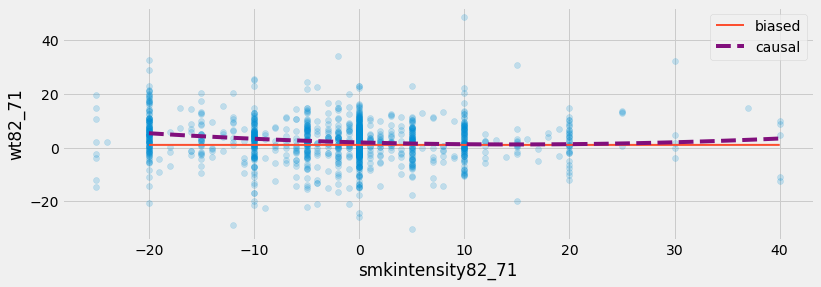

In [20]:
plt.figure(figsize=(12,4))
plt.scatter(df['smkintensity82_71'], df['wt82_71'], alpha=0.2)
x = jnp.linspace(-20, 40, 50)
y = lambda s,x: s['a'].mean() + s['bs'].mean()*x + s['bs2'].mean()*x**2
plt.plot(x, y(samples1, x), c="C1", label='biased', lw=2)
plt.plot(x, y(samples2, x), c='C5', ls='dashed', label='causal')
plt.xlabel('smkintensity82_71')
plt.ylabel('wt82_71')
plt.legend();

## 6. Thêm hiệp biến vào mô hình causal
Một vài hiệp biến trong $L$, như $V$, có thể thêm vào mô hình causal (effect modification). Chẳng hạn, sự tăng cân sẽ khác nhau ở phụ nữ và đàn ông. 

Trong trường hợp đó, bạn nên sử dụng stabilized như sau:
$$SW^A(V) = \frac{f[A|V]}{f[A|L]} $$
$$ Pr[Y^a|V] = \beta_0 + \beta_1a + \beta_2aV + \beta_3V$$

Bạn sẽ phải fit mô hình cho $f[A|V]$.

## 7. Hiện tượng censoring
Trong bài này, chúng ta sử dụng những đối tượng được lưu trữ thông tin cân nặng cuối kỳ nghiên cứu. Nhưng việc loại bỏ những đối tượng bị mất thông tin có thể gây ra selection bias. Hiệu ứng bias của việc mất thông tin (censoring) này có thể được điều chỉnh bằng IP weight.

Để đánh dấu censoring, bạn có thể dùng thên biến `C`. `C=0` tức là không bị censored. Đa số data có `C=0`. `C=1` tức là những đối tượng bị mất thông tin liên lạc,.. hay bị censored.

$$ SW^{A,C} = SW^A * SW^C$$
$$ SW^C = \frac{Pr[C=0|A]}{Pr[C=0|A,L]} $$